# Phase 1: Advanced Environment Validation

## Goal
This notebook initializes the final 3D ocean environment and validates its advanced features. It will:
1. Load the simulation configuration and create the environment.
2. Visualize slices of the generated multi-biome map (Polar, Reef, Open Ocean, Deep Sea).
3. Visualize the nutrient and metabolic modifier maps that are derived from the biomes.
4. Confirm that the core Cellular Automata dynamics for the plankton layer are working correctly.

### 1. Setup and Initialization

In [13]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# Add the project root to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.environment import Environment
from src.utils.config_loader import load_sim_config
# Import the biome data directly for labeling the plot
from src.biome import BIOME_DATA

# --- 1. Load the simulation configuration from the JSON file ---
sim_config = load_sim_config()

# --- 2. Create an instance of the environment, passing the config ---
env = Environment(
    width=sim_config['grid_width'], 
    height=sim_config['grid_height'], 
    depth=sim_config['grid_depth'], 
    config=sim_config
)

print("Environment initialized successfully.")
print(f"Dimensions: W={env.width}, H={env.height}, D={env.depth}")

Environment initialized successfully.
Dimensions: W=50, H=50, D=15


### 2. Visualize Biome Map

Let's inspect the generated biome map at different depths. We expect to see the Polar region on one side, Coral Reefs only in the shallow layers, and Deep Sea only at the bottom.

--- Biome Map at Surface (z=0) ---


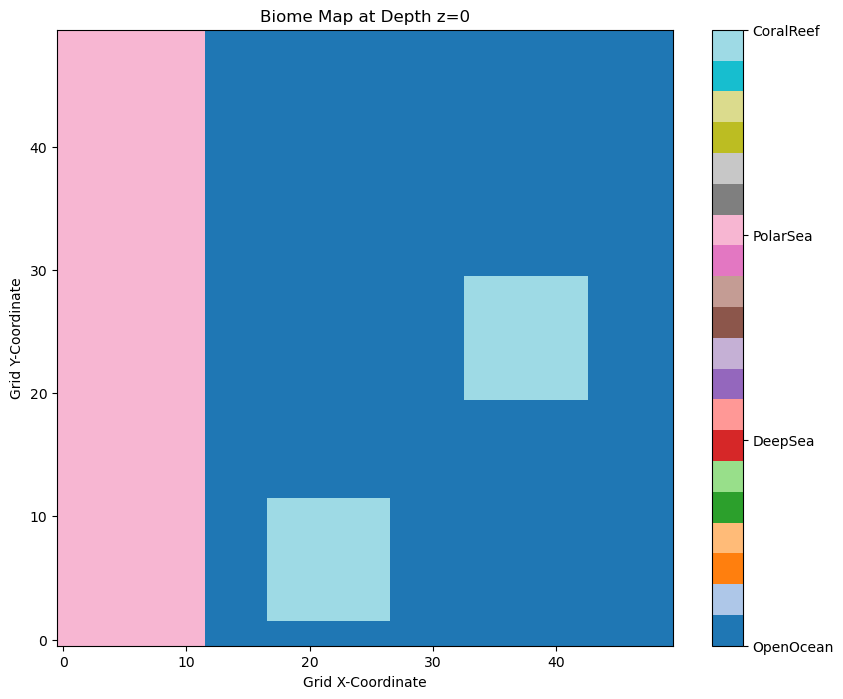


--- Biome Map in Deep Sea (z=12) ---


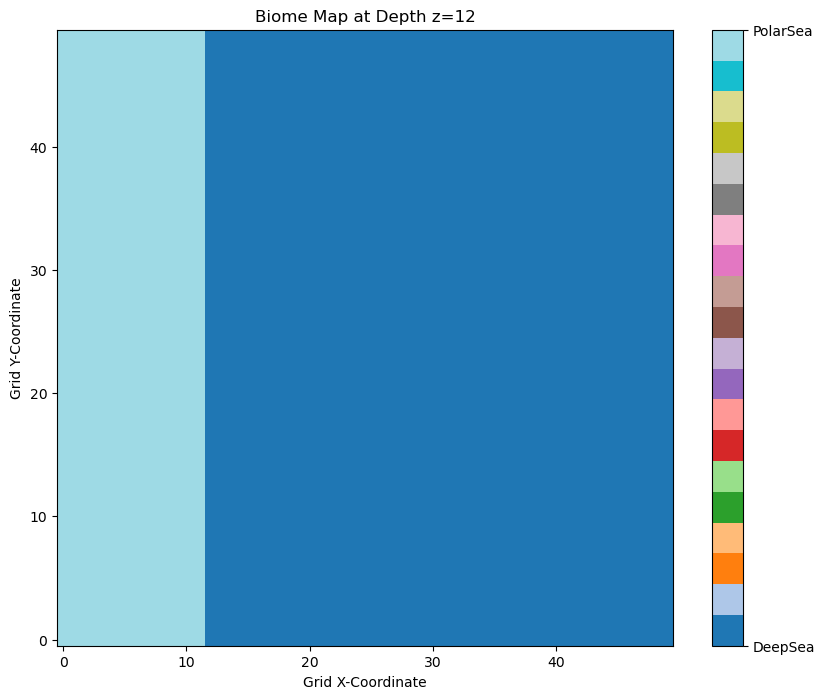

In [14]:
# --- Visualization logic is now self-contained in the notebook ---

def visualize_biome_slice(env, z):
    """Visualizes a 2D slice of the environment's pre-computed biome map."""
    biome_grid_slice = env.biome_map[:, :, z].T
    
    plt.figure(figsize=(10, 8))
    im = plt.imshow(biome_grid_slice, cmap='tab20', origin='lower')
    
    # Create a color bar with the correct biome names from BIOME_DATA
    num_biomes = len(BIOME_DATA)
    ticks = list(range(num_biomes))
    labels = [BIOME_DATA[i]['name'] for i in ticks]
    cbar = plt.colorbar(im, ticks=ticks)
    cbar.set_ticklabels(labels)
    
    plt.title(f"Biome Map at Depth z={z}")
    plt.xlabel("Grid X-Coordinate")
    plt.ylabel("Grid Y-Coordinate")
    plt.show()

# Show a slice from the surface (z=0)
print("--- Biome Map at Surface (z=0) ---")
visualize_biome_slice(env, z=0)

# Show a slice from the deep ocean (z=12)
print("\n--- Biome Map in Deep Sea (z=12) ---")
visualize_biome_slice(env, z=12)


### 3. Visualize Modifier Layers

The biome map is used to generate other data layers that directly affect the simulation. Let's visualize the nutrient map (which affects plankton growth) and the metabolic map (which affects agent energy loss).

--- Nutrient Factor Map at Surface (z=0) ---


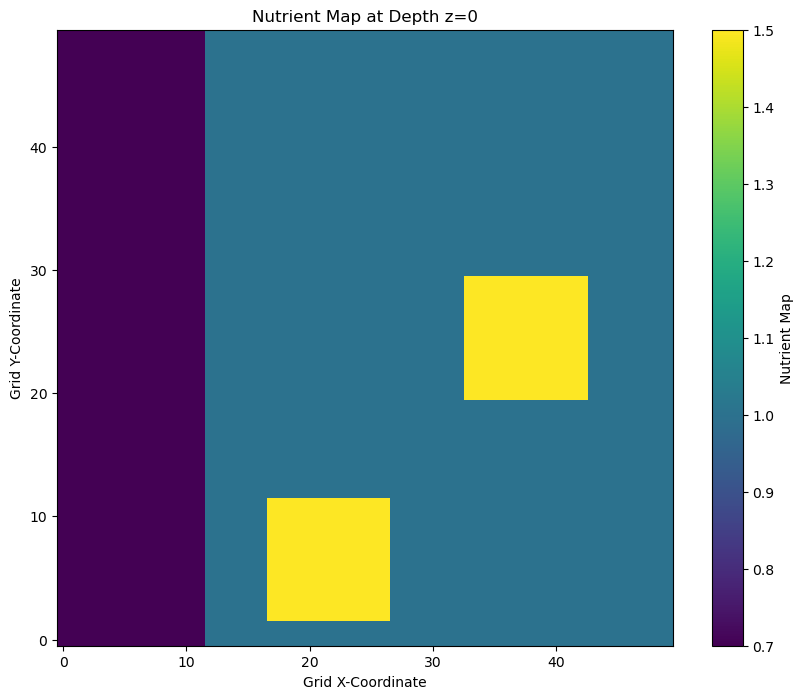


--- Metabolic Modifier Map at Surface (z=0) ---


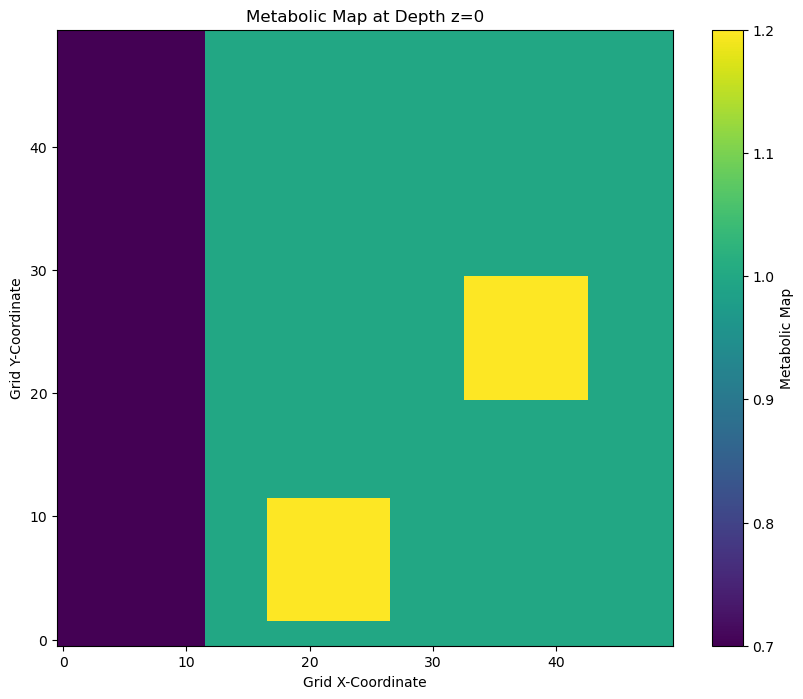

In [15]:
def visualize_layer_slice(env, layer_name, z):
    """Visualizes a 2D slice of any given data layer in the environment."""
    layer = getattr(env, layer_name)
    layer_slice = layer[:, :, z].T

    plt.figure(figsize=(10, 8))
    im = plt.imshow(layer_slice, cmap='viridis', origin='lower')
    plt.colorbar(im, label=layer_name.replace('_', ' ').title())
    plt.title(f"{layer_name.replace('_', ' ').title()} at Depth z={z}")
    plt.xlabel("Grid X-Coordinate")
    plt.ylabel("Grid Y-Coordinate")
    plt.show()

# Show the nutrient modifier at the surface
print("--- Nutrient Factor Map at Surface (z=0) ---")
visualize_layer_slice(env, 'nutrient_map', z=0)

# Show the metabolic modifier at the surface
print("\n--- Metabolic Modifier Map at Surface (z=0) ---")
visualize_layer_slice(env, 'metabolic_map', z=0)

### 4. Observe Plankton Dynamics

Finally, let's run the environment's update loop a few times to confirm that the Cellular Automata rules for plankton diffusion and growth are working as expected. The total plankton should increase over time.

In [16]:
print(f"Initial Total Plankton: {env.plankton.sum():.2f}")

# Run the environment update 10 times
for i in range(10):
    env.update()
    print(f"Tick {i+1:2}: Total Plankton = {env.plankton.sum():.2f}")

print("\nPlankton dynamics simulation complete.")

Initial Total Plankton: 13071.12
Tick  1: Total Plankton = 13622.81
Tick  2: Total Plankton = 14226.95
Tick  3: Total Plankton = 14855.38
Tick  4: Total Plankton = 15480.97
Tick  5: Total Plankton = 16082.33
Tick  6: Total Plankton = 16646.75
Tick  7: Total Plankton = 17169.32
Tick  8: Total Plankton = 17650.19
Tick  9: Total Plankton = 18092.23
Tick 10: Total Plankton = 18499.39

Plankton dynamics simulation complete.


### 5. Conclusion

The environment's initialization is successful. The visualizations confirm that the diverse biome map and its corresponding modifier layers are being generated correctly. The core plankton growth mechanics are also functioning as intended. The environment is a robust foundation for the multi-species simulation.